In [1]:
import numpy as np
import random
import networkx as nx
import matplotlib.pyplot as plt
import pickle
from tqdm import tqdm

## Markov Chains

### Funciones Auxiliares

In [2]:
def g(u, a):
    """
    Calcula el siguiente estado basado en la distribución inicial.

    Parámetros:
    - u: Número Aleatorio.
    - a: Vector de distribución incial.

    Retorna:
    - len(a) - 1: Siguiente estado.
    """
    cumulative_sum = 0
    for i, prob in enumerate(a):
        cumulative_sum += prob
        if u < cumulative_sum:
            return i
    return len(a) - 1

def f(i, u, P):
    """
    Calcula el siguiente estado basado en el estado actual y la probabilidad de transición.

    Parámetros:
    - i: Estado Actual.
    - u: Número Aleatorio.
    - P: Matriz de Transición.

    Retorna:
    - len(P[i]) - 1: Siguiente estado.
    """
    cumulative_sum = 0.0
    for j, prob in enumerate(P[i]):
        cumulative_sum += prob
        if u < cumulative_sum:
            return j
    return len(P[i]) - 1

### Simulación de la Cadena

In [3]:
def simulate_markov_chain(a, P, num_steps):
    """
    Genera una cadena de Markov

    Parámetros:
    - a: Estado Actual.
    - P: Matriz de Transición.
    - num_steps: Longitud deseada para la cadena.

    Retorna:
    - chain: Cadena de Markov.
    """
    chain = []
    U = np.random.rand(num_steps)

    # Simulate the first step using the initial distribution
    chain.append(g(U[0], a))

    # Simulate the rest of the steps using the transition probabilities
    for t in range(1, num_steps):
        chain.append(f(chain[-1], U[t], P))

    return chain

### Ejemplo de Uso

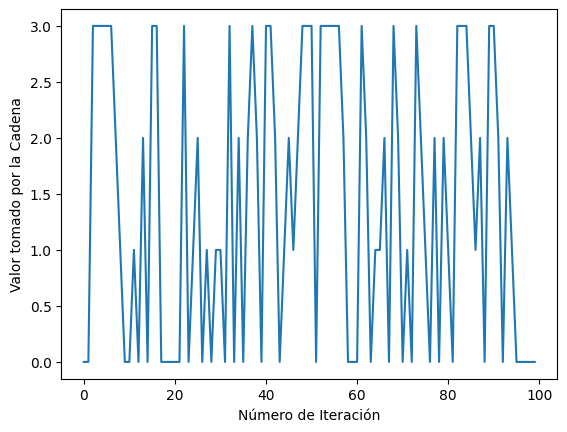

In [4]:
# Example usage
a = np.array([1, 0, 0, 0])
P = np.array([[0.3, 0.25, 0.15, 0.1], [0.3, 0.25, 0.55, 0.2], [0.3, 0.5, 0.1, 0.3], [0.1, 0, 0.2, 0.4]])

chain = simulate_markov_chain(a, P, 100)

plt.ylabel('Valor tomado por la Cadena')
plt.xlabel('Número de Iteración')
plt.plot(chain)